# Data Preprocessing

In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

# Importing data

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('braznikova2.csv', sep=';')

In [4]:
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,success,9,1,MAF,1,3,659,"76,85",1092.0,13884.0,0,0,0,0,1
1,success,22,1,MAF,1,"4,1",1518,"84,86",348.0,11700.0,0,0,0,1,1
2,success,13,1,MAF,1,3,476,"112,02",504.0,6786.0,0,0,0,1,1
3,success,18,1,MAF,1,3,1310,"119,8",418.0,12948.0,0,0,0,1,1
4,success,25,1,Include apartment,1,4,2029,"94,88",108.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,unsuccess,"40,78",1,MAF,2,4,6884,"107,37",337.0,9399.0,0,0,0,0,0
65,unsuccess,"21,5",1,MAF,1,"2,3",4721,"89,13",668.0,14079.0,0,1,1,0,0
66,success,"115,23",1,MAF,1,3,3286,"105,62",295.0,11427.0,0,0,0,0,0
67,success,"34,8",1,Include apartment,2,"4,3",3963,"168,07",0.0,13338.0,0,1,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       69 non-null     object 
 1   X1      69 non-null     object 
 2   X2      69 non-null     int64  
 3   X3      69 non-null     object 
 4   X4      69 non-null     int64  
 5   X5      69 non-null     object 
 6   X6      69 non-null     int64  
 7   X7      62 non-null     object 
 8   X8      64 non-null     float64
 9   X9      64 non-null     float64
 10  X10     69 non-null     int64  
 11  X11     69 non-null     int64  
 12  X12     69 non-null     int64  
 13  X13     69 non-null     int64  
 14  X14     69 non-null     int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 8.2+ KB


In [6]:
df.shape

(69, 15)

# Данный датасет содержит 15 разных переменных и 69 значений.

Х1 - Торговельна площа, кв. м. (object)

X2 - Этаж (int)

X3 - Тип (object)

X4 - Количество касс (int)

X5 - Рейтинг в гуглі (object)

X6 - Количество чеков (int)

X7 - Средний чек (object)

X8 - Офіси (float)

X9 - Середній дохід наcелення,грн (float)

X10 - Магазин мобільного звязку (int)

X11 - Продуктовий ринок (int)

X12 - Речовий ринок (int)

X13 - Транзитна зупинка міжміського ГТ (int)

X14 - Зупинка ГТ (int)

Y - успех (object)



Для  <b>классификации </b> поставлена задача опрделять исходя из имеющихся параметров успешен ли магазин, а в <b>кластеризации</b> определять, к какому типу будет относится магазин иходя из параметров модели.

# Visualization

<AxesSubplot:ylabel='Frequency'>

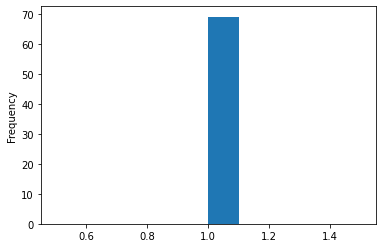

In [7]:

# Feature distribution
df['X2'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

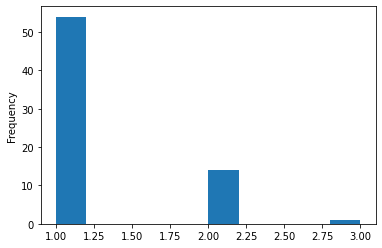

In [8]:

# Feature distribution
df['X4'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

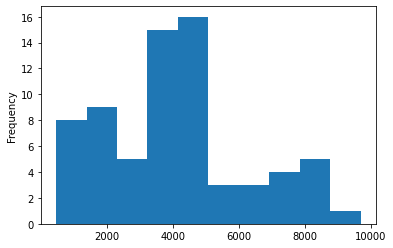

In [9]:

# Feature distribution
df['X6'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

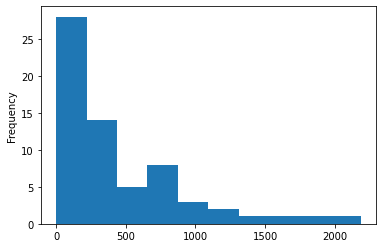

In [10]:

# Feature distribution
df['X8'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

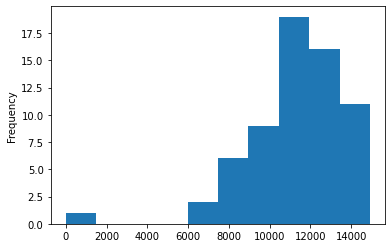

In [11]:

# Feature distribution
df['X9'].plot(kind = 'hist')

Выводы: Х2 (этаж) - не вариативная. Переменная Х8 (офисы) - имеет длинный хвост,а Х9 (средний доход населения) - вероятно содержит выбросы.

# Missing data

In [12]:
# Cheking Missing data
df.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     7
X8     5
X9     5
X10    0
X11    0
X12    0
X13    0
X14    0
dtype: int64

Переменная Х7, Х8 и Х9 содержат пропуски

In [13]:
#!pip install sklearn

In [14]:
# Taking care of missing data
dfm = df

from sklearn.impute import SimpleImputer
#numeric

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

dfm[['X9']] = imputer_mean.fit_transform(dfm[['X9']]).round()


#strings
imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfm[['X8']] = imputer_freq.fit_transform(dfm[['X8']])
dfm[['X7']] = imputer_freq.fit_transform(dfm[['X7']])

In [15]:
dfm.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
dtype: int64

Пропуски по переменным заполнены.

# Outliers

In [16]:
dfm.describe()

,X2,X4,X6,X8,X9,X10,X11,X12,X13,X14
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.0,1.231884,4084.101449,408.000000,11306.855072,0.057971,0.173913,0.130435,0.101449,0.362319
std,0.0,0.458416,2213.335666,457.360297,2347.336283,0.235401,0.381812,0.339248,0.304135,0.484192
min,1.0,1.000000,476.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,2344.000000,91.000000,10296.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,3995.000000,292.000000,11427.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,4826.000000,573.000000,12948.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.0,3.000000,9687.000000,2185.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Вероятно, что выбросы по переменной Х8,Х9

In [17]:
df['X8'].describe()

count      69.000000
mean      408.000000
std       457.360297
min         0.000000
25%        91.000000
50%       292.000000
75%       573.000000
max      2185.000000
Name: X8, dtype: float64

In [18]:
dfm['X9'].describe()

count       69.000000
mean     11306.855072
std       2347.336283
min          0.000000
25%      10296.000000
50%      11427.000000
75%      12948.000000
max      14937.000000
Name: X9, dtype: float64

In [19]:
# Outliers
X8 = []
for k in dfm['X8']:
    if k > round(dfm['X8'].mean() + 3*dfm['X8'].std()):
        k = round(dfm['X8'].mean() + 3*dfm['X8'].std()) 
    X8.append(k)
dfm['X8'] = X8

In [20]:
dfm['X8'].describe()

count      69.000000
mean      402.130435
std       436.335203
min         0.000000
25%        91.000000
50%       292.000000
75%       573.000000
max      1780.000000
Name: X8, dtype: float64

In [21]:
# Outliers
X9 = []
for n in dfm['X9']:
    if n < round(dfm['X9'].mean() - 3*dfm['X9'].std()):
        n = round(dfm['X9'].mean() - 3*dfm['X9'].std()) 
    X9.append(n)
dfm['X9'] = X9

In [22]:
dfm['X9'].describe()

count       69.000000
mean     11368.666667
std       2086.928095
min       4265.000000
25%      10296.000000
50%      11427.000000
75%      12948.000000
max      14937.000000
Name: X9, dtype: float64

In [23]:
dfm.shape

(69, 15)

Таким образом, были проверены переменные (которые по графику были похожи на выбросы), у фактора Х8 значения, которые выходят за 3 сигма - заменены на максимальное, а у фактора Х9 - наоборот на минимальное.

# Encoding

In [24]:

# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [25]:
# Encoding categorical data
dfm = encoding_char(dfm)
dfm

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,0,0,1,0,1,0,659,0,1092.0,13884.0,0,0,0,0,1
1,0,1,1,0,1,1,1518,1,348.0,11700.0,0,0,0,1,1
2,0,2,1,0,1,0,476,2,504.0,6786.0,0,0,0,1,1
3,0,3,1,0,1,0,1310,3,418.0,12948.0,0,0,0,1,1
4,0,4,1,1,1,2,2029,4,108.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,49,1,0,2,2,6884,56,337.0,9399.0,0,0,0,0,0
65,1,8,1,0,1,13,4721,57,668.0,14079.0,0,1,1,0,0
66,0,50,1,0,1,0,3286,58,295.0,11427.0,0,0,0,0,0
67,0,51,1,1,2,7,3963,59,0.0,13338.0,0,1,1,0,0


# Correlations

In [26]:
#!pip install seaborn

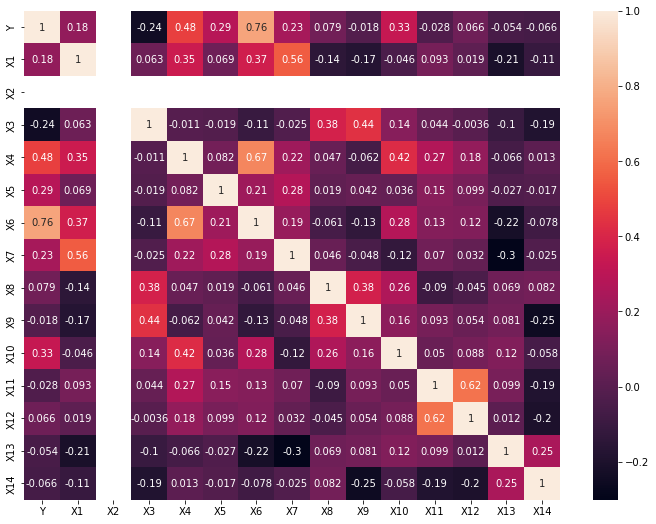

In [27]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Высокая корреляция: 
    
    Х4 и Х6 - убрать из модели Х4
    X7 и Х1 - убрать из модели Х1
    Х12 и Х11 - убрать из модели Х11
    
    
    На зависимую переменную наибольшим образом влияет

In [28]:
# Removing Correlated Data
dfr = df.drop(['X4','X1','X11','X2'], axis='columns', inplace=False)
dfr.shape

(69, 11)

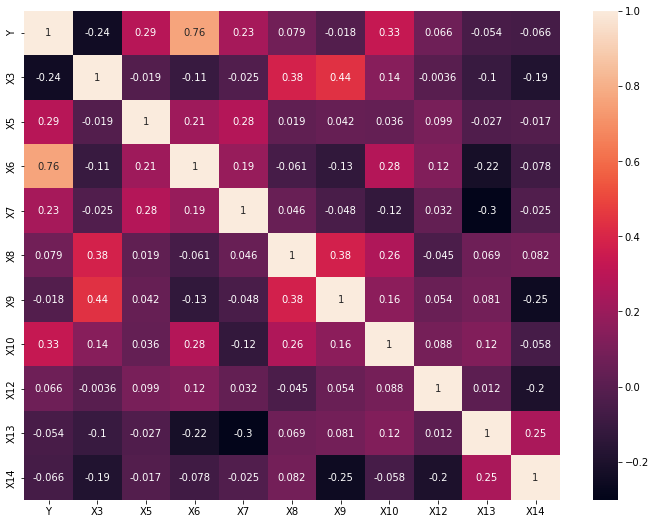

In [29]:
# Cheking correlations
import seaborn as sns
corrmat = dfr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Exporting

In [30]:
# Exporting the dataset
dfr.to_csv('braznikova2_prep.csv', sep=';', index=False)